<a href="https://colab.research.google.com/github/Ell-neto/Modelos_Deteccao_Fraude_e_Credit_Scoring/blob/main/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Scoring

*O Credit Scoring é um modelo estatístico multivariado que cria um modelo matemático e estima, através de uma probabilidade, a chance do nosso cliente ser adimplente ou inadimplente.*

## Base de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv'
dados = pd.read_csv(url)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [30]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   default                      1000 non-null   int64
 1   conta_corrente               1000 non-null   int64
 2   prazo_emprestimo_meses       1000 non-null   int64
 3   historico_credito            1000 non-null   int64
 4   proposito_emprestimo         1000 non-null   int64
 5   valor_emprestimo             1000 non-null   int64
 6   reserva_cc                   1000 non-null   int64
 7   tempo_emprego_atual          1000 non-null   int64
 8   taxa_comp_salario            1000 non-null   int64
 9   sexo_est_civil               1000 non-null   int64
 10  outros_fiadores              1000 non-null   int64
 11  anos_residencia_atual        1000 non-null   int64
 12  propriedade                  1000 non-null   int64
 13  idade                        1000 non-null   int6

In [5]:
linhas = dados.shape[0]
colunas = dados.shape[1]

print('A base de dados tem %s linhas e %s colunas.' %(linhas, colunas))

A base de dados tem 1000 linhas e 21 colunas.


In [6]:
duplicados = dados.duplicated()
duplicados = duplicados.sum()

print('A base de dados tem %s dados duplicados.' %(duplicados))

A base de dados tem 0 dados duplicados.


In [7]:
nulos = dados.isnull()
nulos.sum()

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

## *Variáveis categóricas*

Mudando as colunas object para int com map.

In [8]:
dados.columns

Index(['default', 'conta_corrente', 'prazo_emprestimo_meses',
       'historico_credito', 'proposito_emprestimo', 'valor_emprestimo',
       'reserva_cc', 'tempo_emprego_atual', 'taxa_comp_salario',
       'sexo_est_civil', 'outros_fiadores', 'anos_residencia_atual',
       'propriedade', 'idade', 'outros_planos_financiamento',
       'tipo_residencia', 'n_creditos_banco', 'status_emprego',
       'n_dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [28]:
dados['trabalhador_estrangeiro'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
aa = {'< 0 DM':1, 
     '0 <= ... < 200 DM':2, 
     'no checking account':3,
     'unemployed':4, 
     '>= 200 DM / salary assignments for at least 1 year':5
}

dados['conta_corrente'] = dados['conta_corrente'].map(aa)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [11]:
a = {'critical account/ other credits existing (not at this bank)':1,
     'existing credits paid back duly till now':2,
     'delay in paying off in the past':3,
     'no credits taken/ all credits paid back duly':4,
     'all credits at this bank paid back duly':5
}

dados['historico_credito'] = dados['historico_credito'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [12]:
b = {'domestic appliances':1,
     '(vacation - does not exist?)':2,
     'radio/television':3,
     'car (new)':4,
     'car (used)':5,
     'business':6,
     'repairs':7, 
     'education':8, 
     'furniture/equipment':9, 'retraining':10
}

dados['proposito_emprestimo'] = dados['proposito_emprestimo'].map(b)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [14]:
c = {'unknown/ no savings account':1, 
     '... < 100 DM':2,
     '500 <= ... < 1000 DM ':3, 
     '.. >= 1000 DM ':4, 
     '100 <= ... < 500 DM':5
}

dados['reserva_cc'] = dados['reserva_cc'].map(c)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [15]:
d = {'.. >= 7 years':1, 
     '1 <= ... < 4 years':2, 
     '4 <= ... < 7 years':3,
     'unemployed':4, 
     '... < 1 year ':5
}

dados['tempo_emprego_atual'] = dados['tempo_emprego_atual'].map(d)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [16]:
e = {'male : single':1, 
     'female : divorced/separated/married':2, 
     'male : divorced/separated':3,
     'male : married/widowed':4, 
}

dados['sexo_est_civil'] = dados['sexo_est_civil'].map(e)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,2,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3,2,1,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3,2,1,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2,3,1,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [17]:
ff = {'none':1, 
     'guarantor':2, 
     'co-applicant':3,
}

dados['outros_fiadores'] = dados['outros_fiadores'].map(ff)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,2,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3,2,1,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3,2,1,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2,3,1,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [18]:
g = {'real estate':1, 
     'if not A121 : building society savings agreement/ life insurance':2, 
     'unknown / no property':3,
     'if not A121/A122 : car or other, not in attribute 6':4, 
}

dados['propriedade'] = dados['propriedade'].map(g)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,none,for free,2,skilled employee / official,2,none,yes


In [20]:
h = {'none':1, 
     'bank':2, 
     'stores':3
}

dados['outros_planos_financiamento'] = dados['outros_planos_financiamento'].map(h)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,for free,2,skilled employee / official,2,none,yes


In [21]:
ii = {'own':1, 
     'for free':2, 
     'rent':3
}

dados['tipo_residencia'] = dados['tipo_residencia'].map(ii)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,1,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,1,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,1,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,2,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,2,2,skilled employee / official,2,none,yes


In [23]:
j = {'skilled employee / official':1, 
     'unskilled - resident':2, 
     'management/ self-employed/ highly qualified employee/ officer':3,
     'unemployed/ unskilled - non-resident':4
}

dados['status_emprego'] = dados['status_emprego'].map(j)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,1,2,1,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,1,1,1,1,none,yes
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,1,1,2,2,none,yes
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,2,1,1,2,none,yes
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,2,2,1,2,none,yes


In [26]:
k = {'yes, registered under the customers name ':1, 
     'none':2
}

dados['telefone'] = dados['telefone'].map(k)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,1,2,1,1,1,yes
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,1,1,1,1,2,yes
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,1,1,2,2,2,yes
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,2,1,1,2,2,yes
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,2,2,1,2,2,yes


In [29]:
l = {'yes':1, 
     'no':2
}

dados['trabalhador_estrangeiro'] = dados['trabalhador_estrangeiro'].map(l)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,1,2,1,1,1,1
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,1,1,1,1,2,1
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,1,1,2,2,2,1
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,2,1,1,2,2,1
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,2,2,1,2,2,1


## Regressão Logística

In [31]:
y = dados['default']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [32]:
x = dados.drop(columns = 'default')
x.head()

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,1,6,1,1,1169,1,1,4,1,1,4,1,67,1,1,2,1,1,1,1
1,2,48,2,1,5951,2,2,2,2,1,2,1,22,1,1,1,1,1,2,1
2,3,12,1,2,2096,2,3,2,1,1,3,1,49,1,1,1,2,2,2,1
3,1,42,2,3,7882,2,3,2,1,2,4,2,45,1,2,1,1,2,2,1
4,1,24,3,4,4870,2,2,3,1,1,4,3,53,1,2,2,1,2,2,1


In [33]:
from sklearn.model_selection import train_test_split

SEED = 77

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=SEED)

In [34]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter = 1000)
modelo.fit(x_train, y_train)

print(modelo.score(x_train, y_train))

0.7671428571428571


## Métricas Estatísticas

In [39]:
previsoes = modelo.predict(x_test)

In [41]:
# from sklearn.metrics import accuracy_score

# acuracia = accuracy_score(x_test, previsoes)
# acuracia = round(acuracia, 2)*100
# acuracia

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


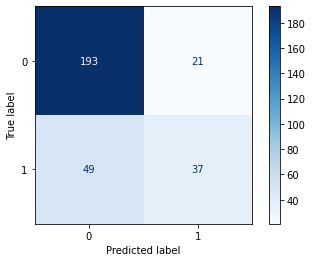

In [37]:
from sklearn.metrics import plot_confusion_matrix

matriz_confusao = plot_confusion_matrix(modelo, x_test, y_test, cmap='Blues', values_format = '.3g')
matriz_confusao

O Classification Report nos dá a acurácia, precisão, recall, F1 score e support do nosso modelo.

Em resumo;
*   Acurácia: É a proporção de acertos em relação a todas as previsões realizadas.
*   Precisão: É a proporção de predições corretas de uma categoria em relação a todas as predições dessa categoria.
*   Recall: É a proporção de predições corretas da categoria alvo.
*   F1 Score: É a média harmônica entre a precisão e o recall.
*   Support: É a quantidade absoluta de casos em cada categoria.



---



*Vemos mais informações sobre cada um deles na análise de Detecção de Fraudes em:* https://github.com/Ell-neto/Modelos_Deteccao_Fraude/blob/main/Detec%C3%A7%C3%A3o_de_fraudes.ipynb


In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       214
           1       0.64      0.43      0.51        86

    accuracy                           0.77       300
   macro avg       0.72      0.67      0.68       300
weighted avg       0.75      0.77      0.75       300



**Curva ROC**


> Avalia o desempenho do modelo a partir da relação entre a taxa de verdadeiros positivos (sensibilidade) e a taxa de falsos positivos (especificidade) para diferentes limites.

AUC - Quantifica a Curva ROC através da área sob essa curva.



roc_auc: 0.7510323842642903


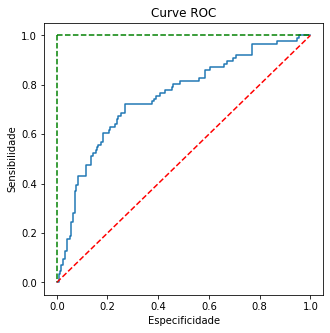

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_previsao = modelo.predict_proba(x_test)[:,1]
#prob_previsao##

#tfp: taxa de falsos positivos
#tvp: taxa de verdadeiros positivos

tfp, tvp, limite = roc_curve(y_test, prob_previsao) #vai definir qual vai ser a curva roc
print('roc_auc:', roc_auc_score(y_test, prob_previsao))  #calcula a area sob a curva roc

#Plotando o gráfico

plt.subplots(1, figsize=(5,5))
plt.title('Curve ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')

plt.plot([0,1], ls= "--", c='red')
plt.plot([0,0],[1,0], ls="--", c='green'), plt.plot([1, 1], ls="--", c='green')

plt.show()

## Análise e visualização de dados

In [47]:
variaveis_analise = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']
dados[variaveis_analise].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.686000,35.546000,20.903000,3271.258000,0.300000
std,0.931811,11.375469,12.058814,2822.736876,0.458487
min,1.000000,19.000000,4.000000,250.000000,0.000000
25%,1.000000,27.000000,12.000000,1365.500000,0.000000
50%,1.000000,33.000000,18.000000,2319.500000,0.000000
75%,2.000000,42.000000,24.000000,3972.250000,1.000000
max,4.000000,75.000000,72.000000,18424.000000,1.000000


In [48]:
#homem = categorias 1,3,4
#mulher = categorias 2, 5

dados['sexo_est_civil'].value_counts()

#temos 310 mulheres e 690 homens

1    548
2    310
4     92
3     50
Name: sexo_est_civil, dtype: int64

In [49]:
dados['default'].value_counts()

#a nossa base de dados é desbalanceada

0    700
1    300
Name: default, dtype: int64

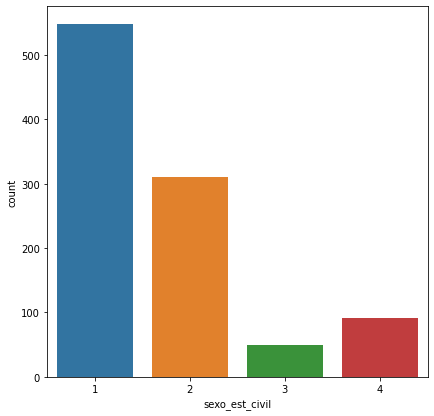

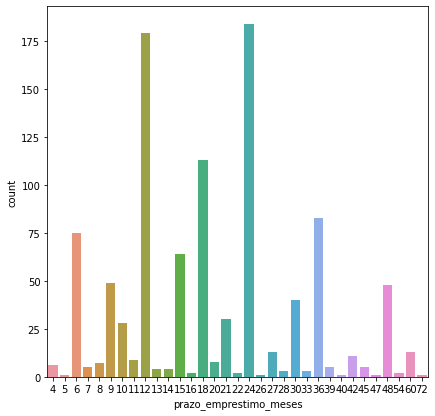

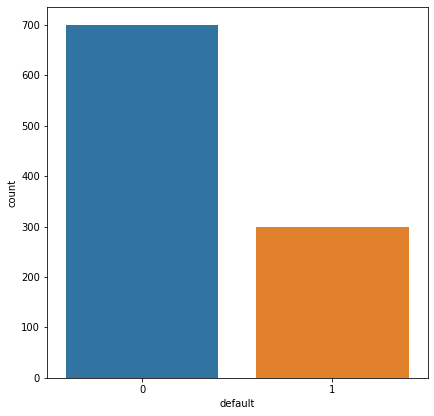

In [51]:
histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default']

lista_histogramas = list(enumerate(histogramas))


for i in lista_histogramas:
  plt.figure(figsize = (15,15))
  plt.subplot(2,2, i[0]+1)
  sns.countplot(x=i[1], data=dados)
  plt.show()

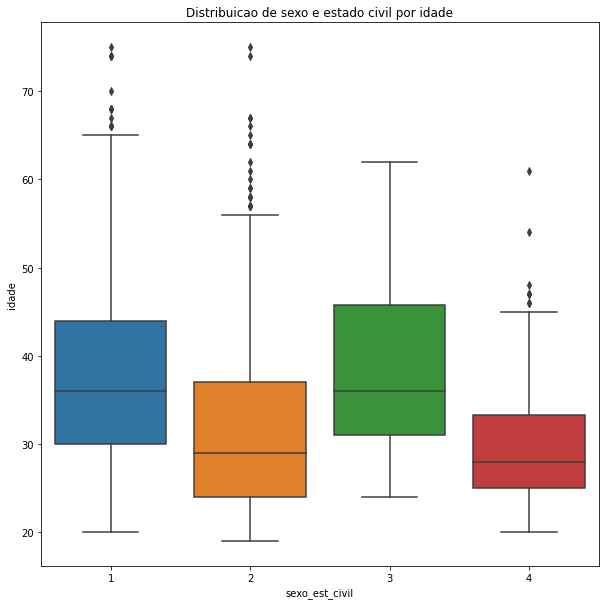

In [52]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'sexo_est_civil', y = 'idade', data=dados)
plt.title('Distribuicao de sexo e estado civil por idade')
plt.show()

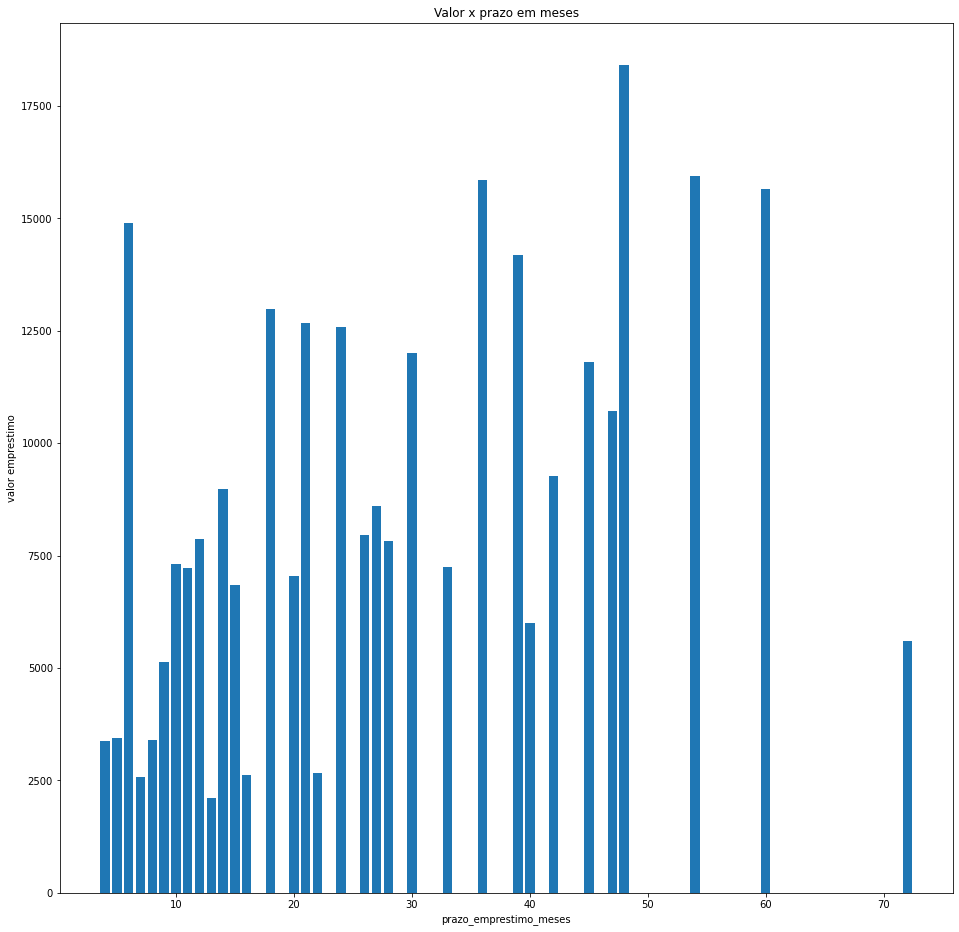

In [54]:
plt.figure(figsize = (16,16))
plt.bar(dados.prazo_emprestimo_meses, dados.valor_emprestimo)
plt.xlabel('prazo_emprestimo_meses')
plt.ylabel('valor emprestimo')
plt.title('Valor x prazo em meses')
plt.show()

## Comparação e escolha do modelo

In [55]:
# categorias da variavel 'sexo_est_civil'

# male : divorced/separated = 1
# female : divorced/separated/married = 2
# male : single = 3
# male : married/widowed = 4
# female : single = 5

#criando a variavel sexo
# 1 = mulher
# 0 = homem

#criando a variavel 'estado_civil'
#1 = solteira
#0 = casada/divorciada/viuva

#### Como no Brasil o sexo é uma informação sensível decidido pelo banco central, é necessário fazermos a troca acima


dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}

dados['sexo'] = dados['sexo_est_civil'].map(dic_sexo)
dados['estado_civil'] = dados['sexo_est_civil'].map(dic_est_civil)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil
0,0,1,6,1,1,1169,1,1,4,1,...,67,1,1,2,1,1,1,1,0,0
1,1,2,48,2,1,5951,2,2,2,2,...,22,1,1,1,1,1,2,1,1,0
2,0,3,12,1,2,2096,2,3,2,1,...,49,1,1,1,2,2,2,1,0,0
3,0,1,42,2,3,7882,2,3,2,1,...,45,1,2,1,1,2,2,1,0,0
4,1,1,24,3,4,4870,2,2,3,1,...,53,1,2,2,1,2,2,1,0,0


In [86]:
# funcao 'roda_modelo': ajuste a validacao

def roda_modelo(dados, classificador):

#separando a base de modelagem e variavel resposta

    y = dados['default']
    x = dados.drop(columns='default')

#separando a base de treino e teste
    SEED = 77
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=SEED)

# Ajustando modelo com base de teste

    modelo = classificador
    modelo.fit(x_train, y_train)


#---------------------------------------------------------------------------------------------------------------------------------------------------

#matriz de confusao
    matriz_confusao = plot_confusion_matrix(modelo, x_test, y_test, values_format = '.3g', cmap = 'jet')
    plt.title('Matriz de Confusao')
    plt.show()

#classification report

    previsoes = modelo.predict(x_test)

    print(100*'-')
    print(' Classification Report:')
    print(classification_report(y_test, previsoes))

#curva ROC e AUC

    print(100*'-')
    prob_previsao = modelo.predict_proba(x_test)[:,1]

    tfp, tvp, limite = roc_curve(y_test, prob_previsao)
    print('roc_auc:', roc_auc_score(y_test, prob_previsao))

    plt.subplots(1, figsize=(5,5))
    plt.title('Curva ROC')
    plt.plot(tfp, tvp)
    plt.plot([0,1], ls= "--", c='red')
    plt.plot([0,0],[1,0], ls="--", c='green'), plt.plot([1, 1], ls="--", c='green')
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.show()

    return modelo, matriz_confusao

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


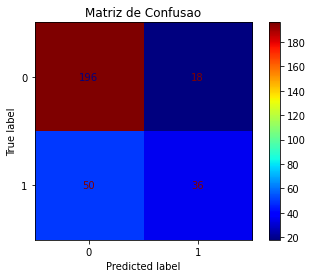

----------------------------------------------------------------------------------------------------
 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       214
           1       0.67      0.42      0.51        86

    accuracy                           0.77       300
   macro avg       0.73      0.67      0.68       300
weighted avg       0.76      0.77      0.76       300

----------------------------------------------------------------------------------------------------
roc_auc: 0.7520104325146708


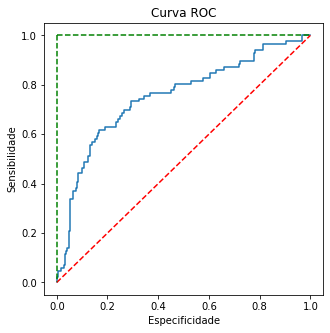

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fbea2771e50>)

In [87]:
roda_modelo(dados, LogisticRegression(max_iter = 1000))

In [88]:
dados['faixa_idade'] = pd.cut(x = dados['idade'], bins=[18, 30, 40, 50, 60, 70, 80], labels=[1, 2, 3, 4, 5, 6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade
0,0,1,6,1,1,1169,1,1,4,1,...,1,1,2,1,1,1,1,0,0,5
1,1,2,48,2,1,5951,2,2,2,2,...,1,1,1,1,1,2,1,1,0,1
2,0,3,12,1,2,2096,2,3,2,1,...,1,1,1,2,2,2,1,0,0,3
3,0,1,42,2,3,7882,2,3,2,1,...,1,2,1,1,2,2,1,0,0,3
4,1,1,24,3,4,4870,2,2,3,1,...,1,2,2,1,2,2,1,0,0,4


In [89]:
dados['faixa_prazo_emprestimo'] = pd.cut(x = dados['prazo_emprestimo_meses'], bins=[1, 12, 24, 36, 48, 60, 72], labels=[1, 2, 3, 4, 5, 6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_prazo_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,1,2,1,1,1,1,0,0,5,1
1,1,2,48,2,1,5951,2,2,2,2,...,1,1,1,1,2,1,1,0,1,4
2,0,3,12,1,2,2096,2,3,2,1,...,1,1,2,2,2,1,0,0,3,1
3,0,1,42,2,3,7882,2,3,2,1,...,2,1,1,2,2,1,0,0,3,4
4,1,1,24,3,4,4870,2,2,3,1,...,2,2,1,2,2,1,0,0,4,2


In [90]:
dados['faixa_valor_emprestimo'] = pd.cut(x = dados['valor_emprestimo'], bins=[1,1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000], 
   labels=[1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,2,1,1,1,1,0,0,5,1,2
1,1,2,48,2,1,5951,2,2,2,2,...,1,1,1,2,1,1,0,1,4,6
2,0,3,12,1,2,2096,2,3,2,1,...,1,2,2,2,1,0,0,3,1,3
3,0,1,42,2,3,7882,2,3,2,1,...,1,1,2,2,1,0,0,3,4,8
4,1,1,24,3,4,4870,2,2,3,1,...,2,1,2,2,1,0,0,4,2,5


In [91]:
# regressao sem variaveis sexo, sexo_est_civil e variaveis absolutas

colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = dados.drop(columns = colunas_retiradas)
base_dados.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,1,1,1,1,4,1,4,1,...,1,2,1,1,1,1,0,5,1,2
1,1,2,2,1,2,2,2,1,2,1,...,1,1,1,1,2,1,0,1,4,6
2,0,3,1,2,2,3,2,1,3,1,...,1,1,2,2,2,1,0,3,1,3
3,0,1,2,3,2,3,2,2,4,2,...,2,1,1,2,2,1,0,3,4,8
4,1,1,3,4,2,2,3,1,4,3,...,2,2,1,2,2,1,0,4,2,5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


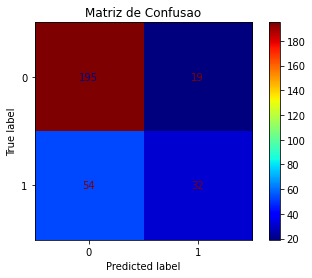

----------------------------------------------------------------------------------------------------
 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       214
           1       0.63      0.37      0.47        86

    accuracy                           0.76       300
   macro avg       0.71      0.64      0.65       300
weighted avg       0.74      0.76      0.73       300

----------------------------------------------------------------------------------------------------
roc_auc: 0.7592914583786133


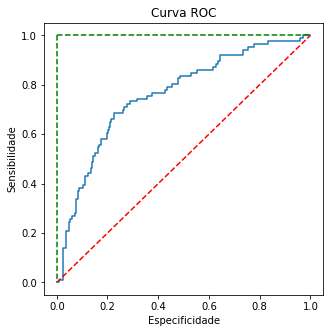

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fbea268b490>)

In [92]:
roda_modelo(base_dados, LogisticRegression(max_iter=1000))

A regressão logística sem as variaveis sexo, sexo_est_civil e variaveis absolutas, e modificadas como a partir das cinco ultimas linhas, fez com que houvesse uma melhora no Recall e F1-score, a accuracy caiu 1 ponto e a precision diminuiu também, mas esse último resultado pode ser válido dependendo da empresa, inclusive se a empresa for muito conservadora, que apesar de que perdeu um pouco de precisão, mas ganhou um pouco em recall (apetite de risco não tão alto).